<a href="https://colab.research.google.com/github/hmckinn4/xGAgainstStats/blob/main/xGAgainstStats_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- Analyzing data for sheet: 2024.min.20.games ---
Pearson correlation between **Rating** and Games: -0.2548
Pearson correlation between **Rating** and TotalShotsAgainst: -0.4349
Pearson correlation between **Rating** and TOITotalSeconds: -0.2540
Pearson correlation between **Rating** and TOIEVSeconds: -0.1812
Pearson correlation between **Rating** and Min/Game: -0.1846
Pearson correlation between **Games** and TotalShotsAgainst: 0.8256
Pearson correlation between **TOITotalSeconds** and TotalShotsAgainst: 0.9597

--- Analyzing data for sheet: 2024.min.400.minutes ---
Pearson correlation between **Rating** and Games: -0.1801
Pearson correlation between **Rating** and TotalShotsAgainst: -0.4650
Pearson correlation between **Rating** and TOITotalSeconds: -0.2560
Pearson correlation between **Rating** and TOIEVSeconds: -0.1736
Pearson correlation between **Rat

<ipython-input-2-ed3645cd58d5>:86: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 6))



--- Scatter Plots with Trend Lines ---


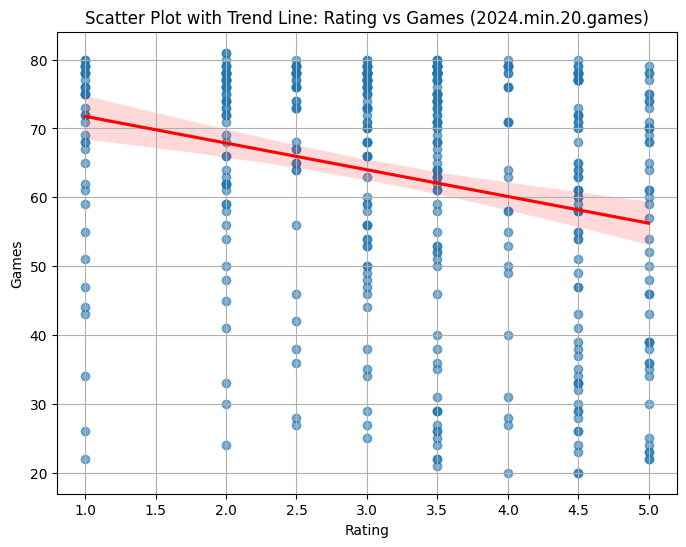

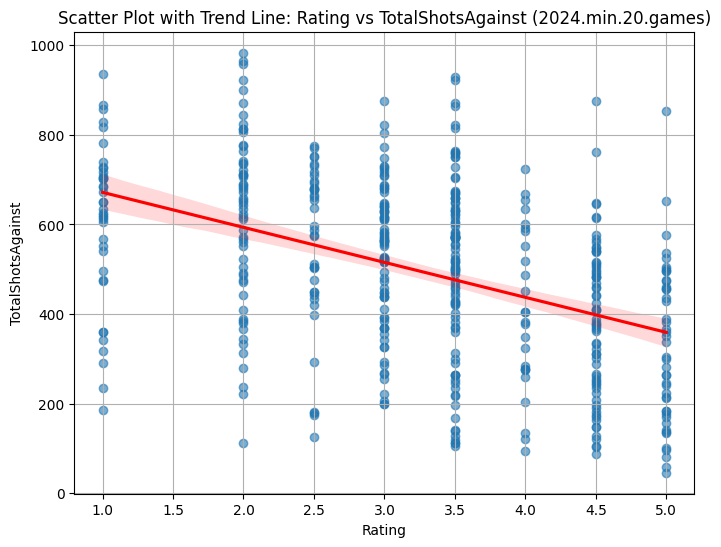

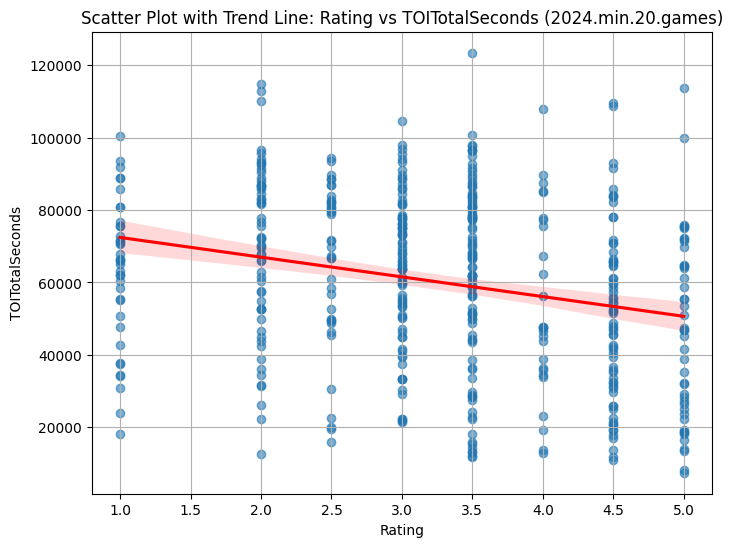

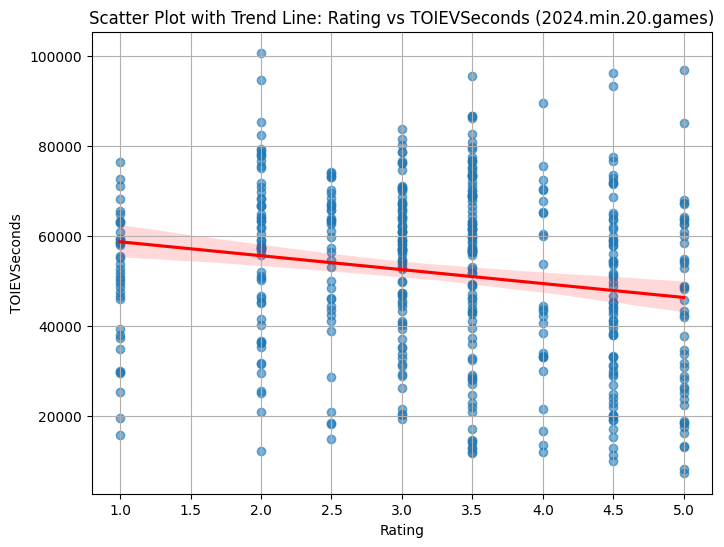

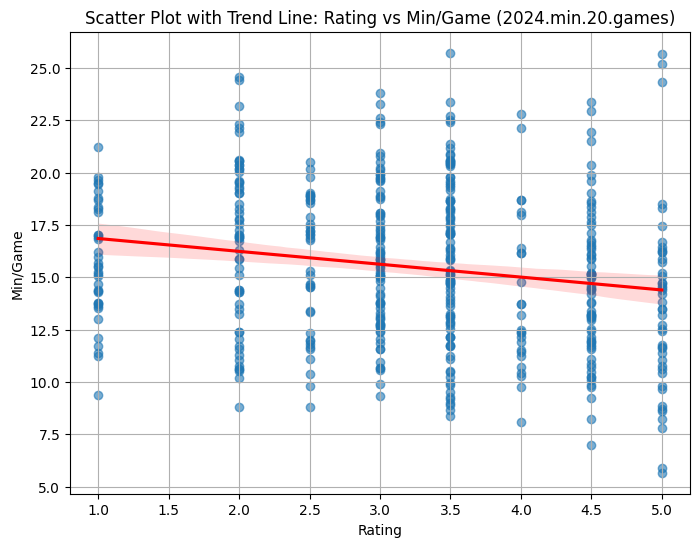

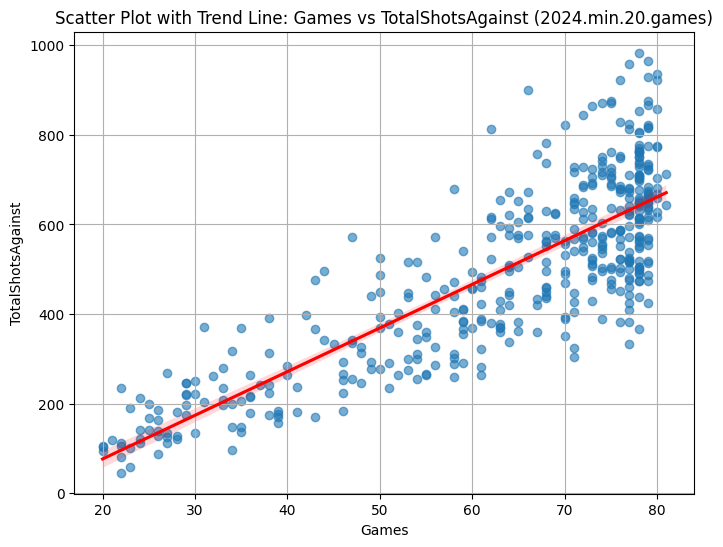

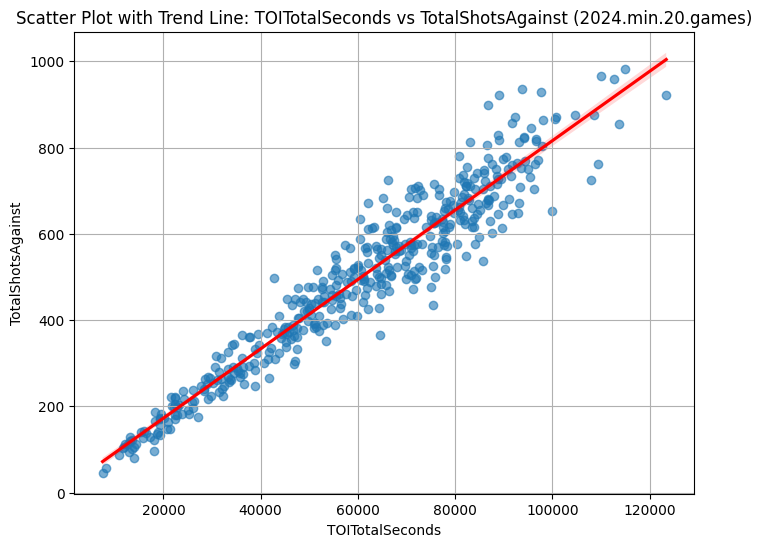

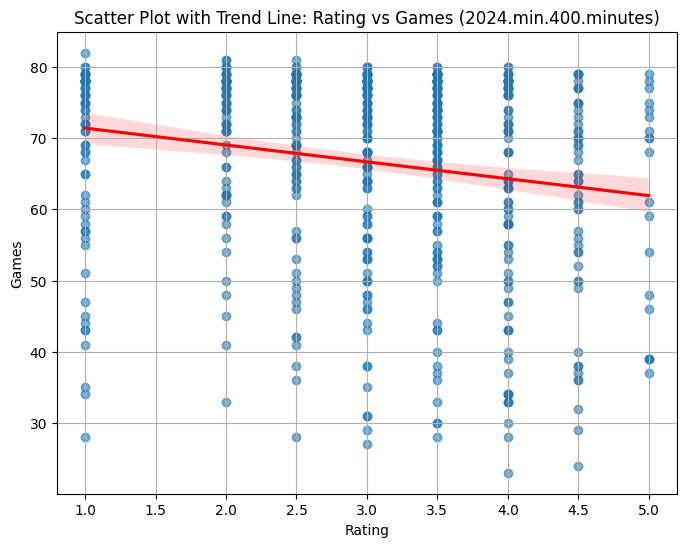

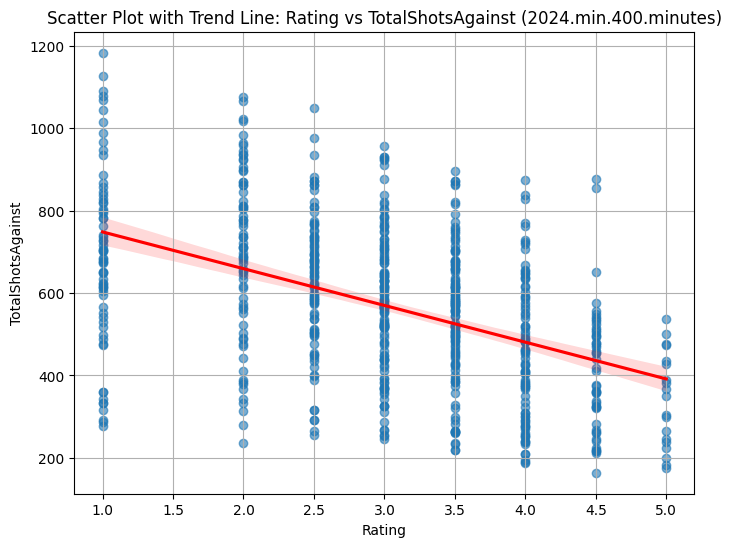

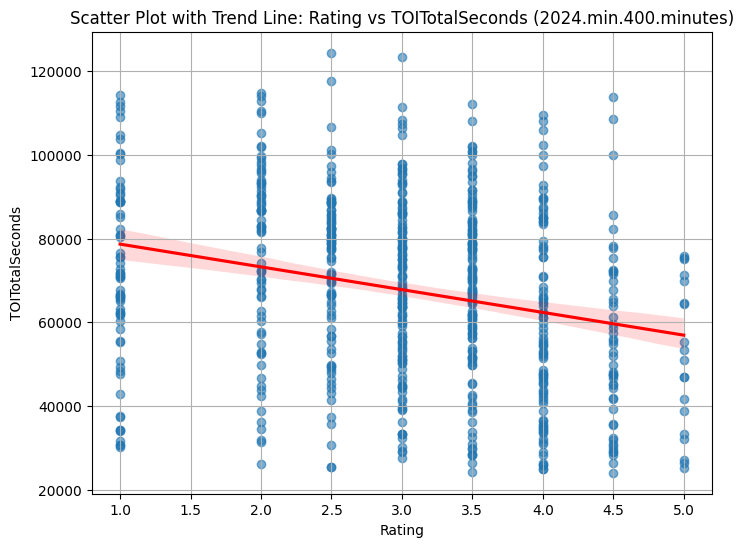

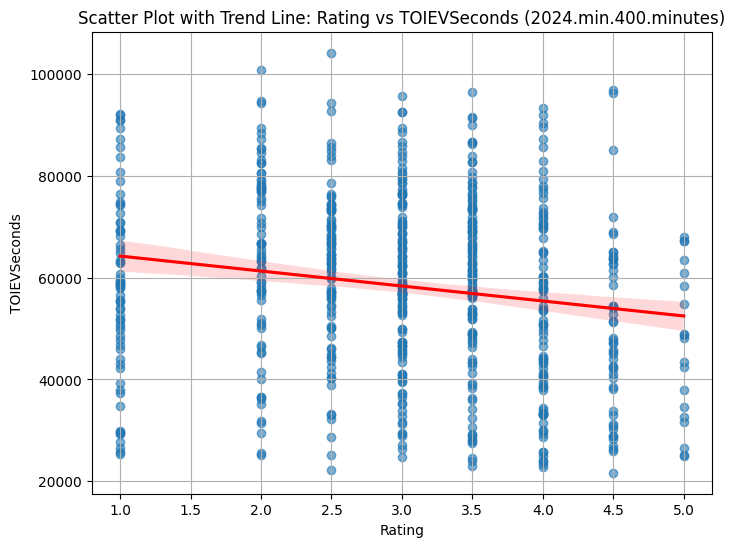

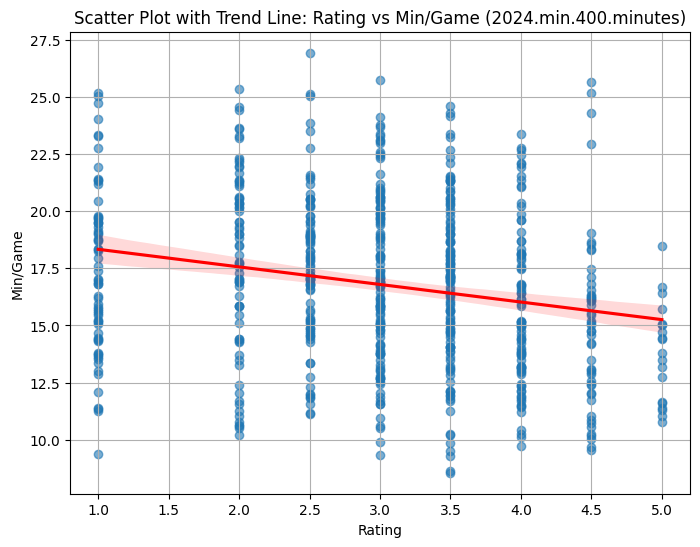

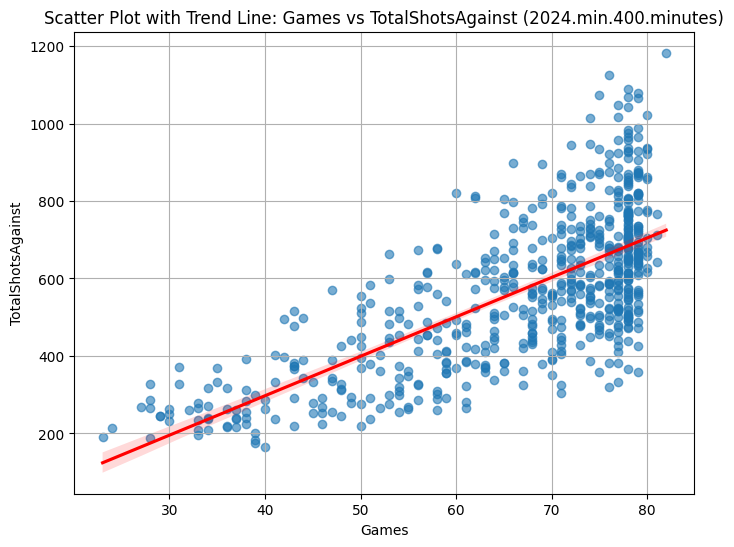

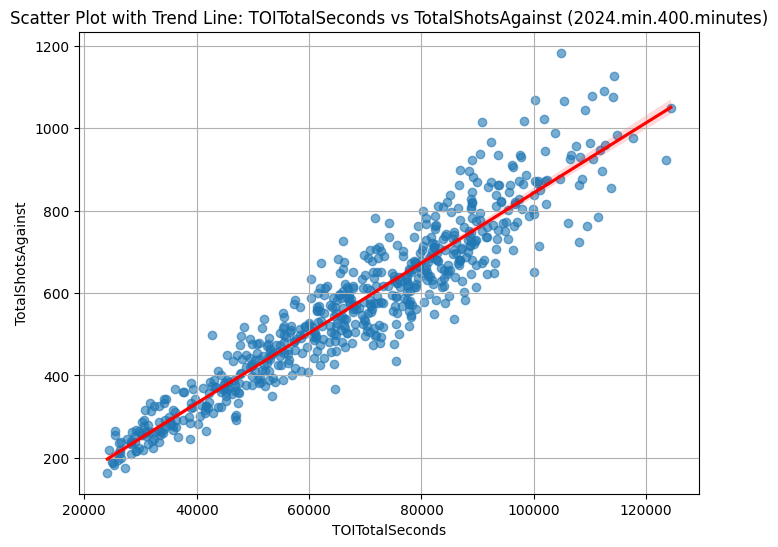

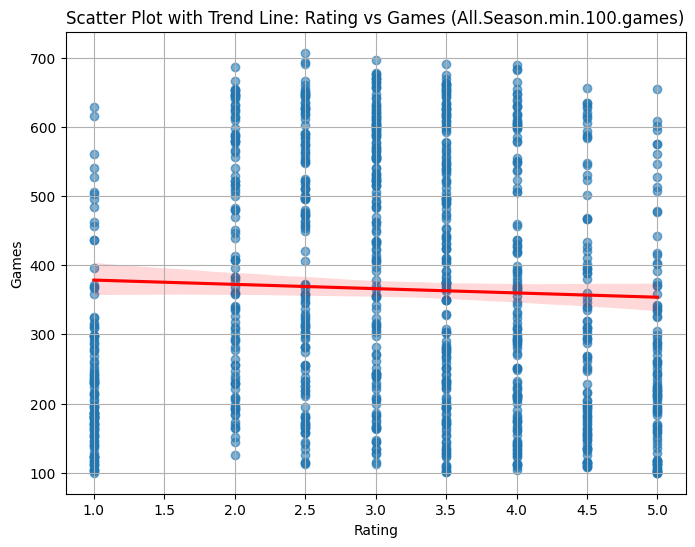

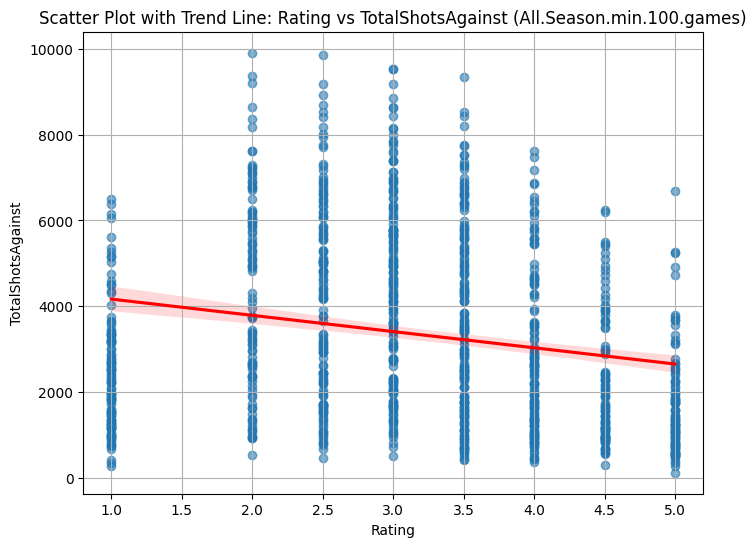

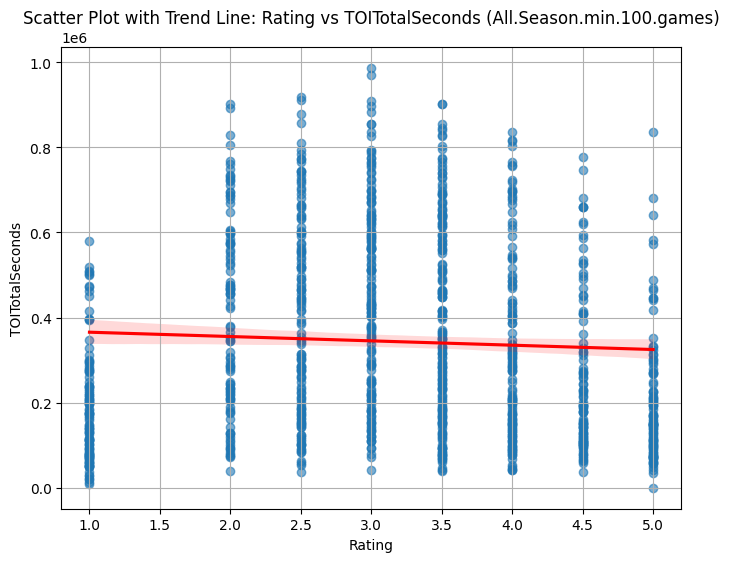

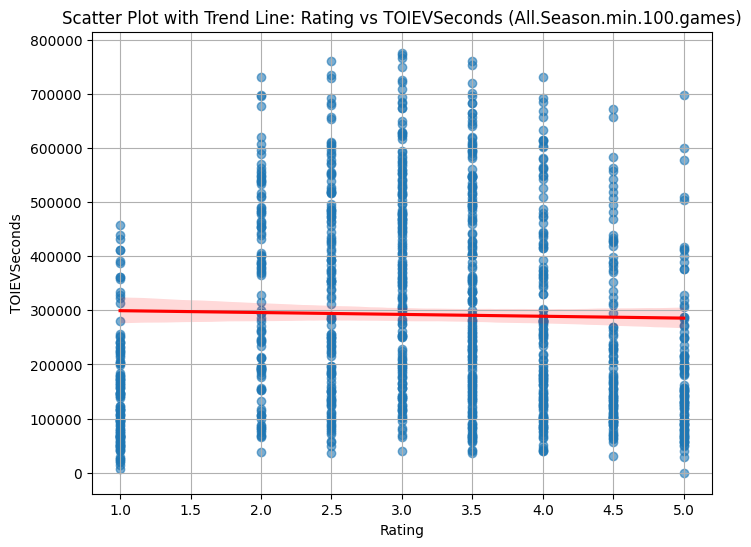

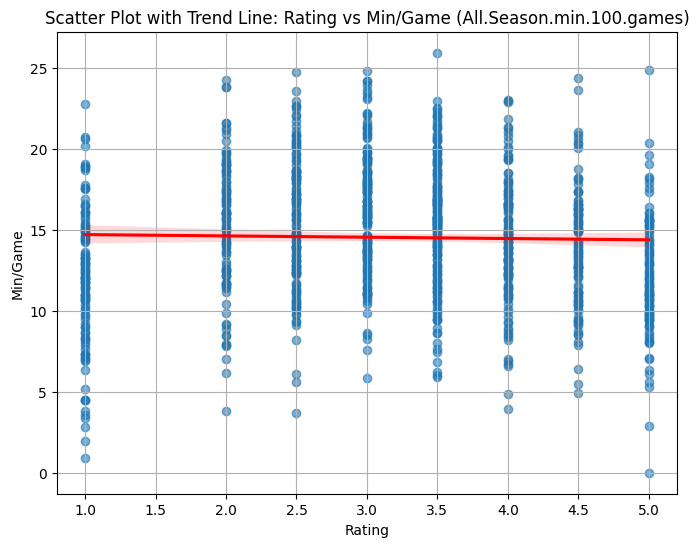

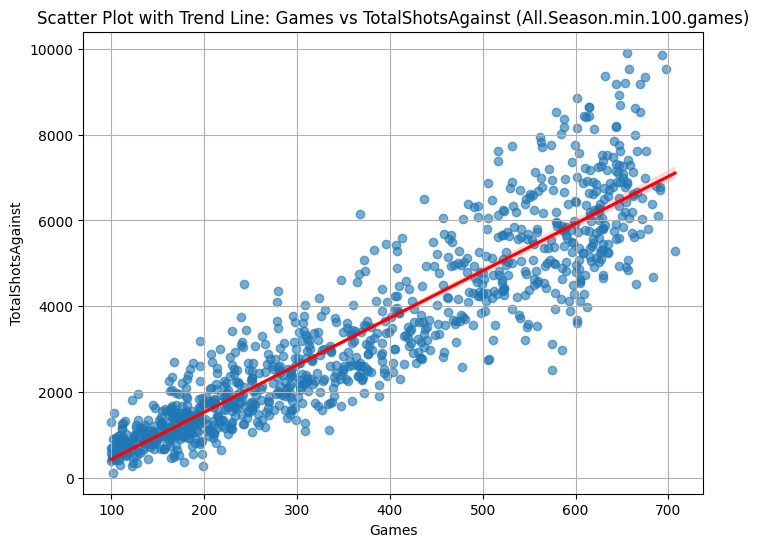

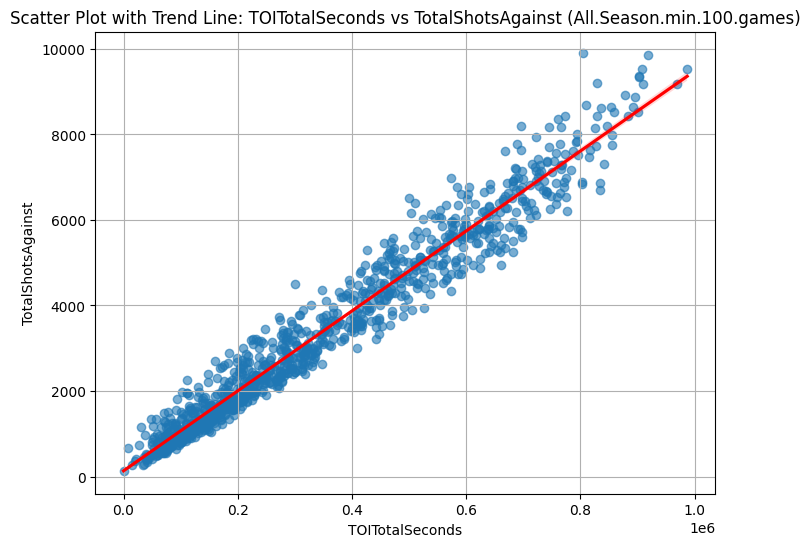


--- End of Analysis ---


In [ ]:
# 1) Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2) Import pandas, gspread for Google Sheets, and seaborn for plotting
import pandas as pd
from google.colab import auth
from google.auth import default
import gspread
import matplotlib.pyplot as plt
import seaborn as sns

# 3) Authenticate Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# 4) Specify the Google Sheet name
sheet_name = "xGAgainstStats"

# 5) Open the Google Sheet
try:
    spreadsheet = gc.open(sheet_name)
except gspread.SpreadsheetNotFound:
    print(f"Error: Spreadsheet '{sheet_name}' not found. Please ensure the name is correct and it's in your Google Drive.")
    exit()

# 6) Define the sheets and the correlations to run
sheets_and_correlations = {
    "2024.min.20.games": [
        ("Rating", "Games"),
        ("Rating", "TotalShotsAgainst"),
        ("Rating", "TOITotalSeconds"),
        ("Rating", "TOIEVSeconds"),
        ("Rating", "Min/Game"),
        ("Games", "TotalShotsAgainst"),
        ("TOITotalSeconds", "TotalShotsAgainst"),
    ],
    "2024.min.400.minutes": [
        ("Rating", "Games"),
        ("Rating", "TotalShotsAgainst"),
        ("Rating", "TOITotalSeconds"),
        ("Rating", "TOIEVSeconds"),
        ("Rating", "Min/Game"),
        ("Games", "TotalShotsAgainst"),
        ("TOITotalSeconds", "TotalShotsAgainst"),
    ],
    "All.Season.min.100.games": [
        ("Rating", "Games"),
        ("Rating", "TotalShotsAgainst"),
        ("Rating", "TOITotalSeconds"),
        ("Rating", "TOIEVSeconds"),
        ("Rating", "Min/Game"),
        ("Games", "TotalShotsAgainst"),
        ("TOITotalSeconds", "TotalShotsAgainst"),
    ],
}

# Store correlation results and figures
all_correlations = {}
all_figures = []

# 7) Loop through each sheet and calculate correlations and store graphs
for sheet_title, correlations in sheets_and_correlations.items():
    try:
        worksheet = spreadsheet.worksheet(sheet_title)
        data = worksheet.get_all_values()
        headers = data[0]
        df = pd.DataFrame(data[1:], columns=headers)
        all_correlations[sheet_title] = {}

        print(f"\n--- Analyzing data for sheet: {sheet_title} ---")

        for col1, col2 in correlations:
            if col1 in df.columns and col2 in df.columns:
                # Convert columns to numeric, coercing errors to NaN
                df[col1] = pd.to_numeric(df[col1], errors='coerce')
                df[col2] = pd.to_numeric(df[col2], errors='coerce')

                # Calculate Pearson correlation
                correlation = df[col1].corr(df[col2], method='pearson')
                all_correlations[sheet_title][(col1, col2)] = correlation
                print(f"Pearson correlation between **{col1}** and {col2}: {correlation:.4f}")

                # Create a scatter plot with a trend line using seaborn
                fig, ax = plt.subplots(figsize=(8, 6))
                sns.regplot(x=df[col1], y=df[col2], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, order=1)
                ax.set_title(f"Scatter Plot with Trend Line: {col1} vs {col2} ({sheet_title})")
                ax.set_xlabel(col1)
                ax.set_ylabel(col2)
                ax.grid(True)
                all_figures.append(fig)

            else:
                print(f"Warning: One or both columns ('{col1}', '{col2}') not found in sheet '{sheet_title}'. Skipping correlation and graph.")

    except gspread.WorksheetNotFound:
        print(f"Error: Sheet '{sheet_title}' not found in the spreadsheet.")
    except Exception as e:
        print(f"An error occurred while processing sheet '{sheet_title}': {e}")

# # 8) Print all correlation results
# print("\n--- All Correlation Results ---")
# for sheet, corrs in all_correlations.items():
#     print(f"\nCorrelations for sheet: {sheet}")
#     for (c1, c2), value in corrs.items():
#         print(f"Pearson correlation between **{c1}** and {c2}: {value:.4f}")

# 9) Display all the figures
print("\n--- Scatter Plots with Trend Lines ---")
for fig in all_figures:
    plt.show(fig)

print("\n--- End of Analysis ---")